In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

font=[0,0,0]
flent=[]
tlent=[]
poslent=[]
posdia=[]
diametre=[]

print("SIMULADOR D'ÒPTICA GEOMÈTRICA (els diafragmes encara no estan implementats)")
print("les lents es col·locaran centrades a l'eix òptic , que a tots els efectes esdevindrà l'eix X del simulador")
print("col·loqui si us plau les lents i els diafragmes per ordre")
font[0] = float(input("l'objecte està a l'infinit ? SÍ=1 , NO=0 : "))
font[2] = float(input("densitat de rajos ( atenció : pot afectar el rendiment ) : "))/2

nlents = int ( input( "quantes lents vol emprar ? "))
for i in range (1, nlents+1):
    poslent.append(float (input ("pos_x de la lent "+str(i)+" : ")))
    flent.append(float (input ("focal de la lent "+str(i)+" ( positiu si convergent , negatiu si divergent ) : ")))
    if flent[i-1]<0:
        tlent.append(-1)
    else:
        tlent.append(1)
    diametre.append(float (input("diàmetre de la lent "+str(i)+" : ")))
    
#ndia = int ( input( "quants diafragmes usarà ? "))
ndia = 0
for i in range (0, ndia):
    posdia.append(float (input ("pos_x del diafragma "+str(i)+" : ")))
    diametre.append(float (input("diàmetre del diafragma "+str(i)+" : ")))

if font[0]==0 :
    print("pos_x punt objecte : 0")
    font[1] = float(input("alçada_y punt objecte : "))
else :
    font[1] = float(input("angle en camp ( radians ) : "))
    angle = font[1]

esten = int(input("estendre rajos que s'escapen ? SÍ=1 , NO=0 : "))
    
print("\ncomprovant d'èxit d'operacions : ")
print(font)
print(nlents)
print(flent)
print(tlent)
print(poslent)
print(ndia)
print(posdia)
print(diametre)

SIMULADOR D'ÒPTICA GEOMÈTRICA (els diafragmes encara no estan implementats)
les lents es col·locaran centrades a l'eix òptic , que a tots els efectes esdevindrà l'eix X del simulador
col·loqui si us plau les lents i els diafragmes per ordre
l'objecte està a l'infinit ? SÍ=1 , NO=0 : 1
densitat de rajos ( atenció : pot afectar el rendiment ) : 25
quantes lents vol emprar ? 2
pos_x de la lent 1 : 5
focal de la lent 1 ( positiu si convergent , negatiu si divergent ) : 5
diàmetre de la lent 1 : 10
pos_x de la lent 2 : 14
focal de la lent 2 ( positiu si convergent , negatiu si divergent ) : 4
diàmetre de la lent 2 : 10
angle en camp ( radians ) : 1
estendre rajos que s'escapen ? SÍ=1 , NO=0 : 1

comprovant d'èxit d'operacions : 
[1.0, 1.0, 12.5]
2
[5.0, 4.0]
[1, 1]
[5.0, 14.0]
0
[]
[10.0, 10.0]


In [2]:
def pintalents ():
    for i in range(0,nlents):
        plt.arrow(poslent[i] , -diametre[i]/2 , 0 , diametre[i] , head_width=0.15*tlent[i], head_length=0.15*tlent[i])       
        plt.arrow(poslent[i] , diametre[i]/2 , 0 , -diametre[i] , head_width=0.15*tlent[i], head_length=0.15*tlent[i])

        x = [poslent[i]+flent[i], poslent[i]-flent[i]]
        y = [0, 0]
        plt.plot(x, y, color='black', marker='o', markersize=2, linewidth=0)
        plt.axline((0, 0), (1, 0), linewidth=0.1, color='black', linestyle='dashed')

In [3]:
def generatriu ():
    listy = []
    dmtr = diametre[0]
    
    if font[0]==0:
        for i in range(0,2*int(font[2])+1):
            x= [0, poslent[0]]
            y= [font[1], (dmtr/2)-i*(dmtr/(2*font[2]))]

            listy.append( (dmtr/2)-i*(dmtr/(2*font[2])) )

            plt.plot(x,y, color='g', linewidth=0.25)
        
    else:
        for i in range(0,2*int(font[2])+1):
            x= [0, poslent[0]]
            y= [(dmtr/2)-i*(dmtr/(2*font[2])) +  math.tan(angle)*poslent[0], (dmtr/2)-i*(dmtr/(2*font[2])) ]

            listy.append( (dmtr/2)-i*(dmtr/(2*font[2])) )

            plt.plot(x,y, color='g', linewidth=0.25)
    
    return listy

In [4]:
def travessalent(flent, poslent, posNXT, l):
    
    global actualYvect
    global yIMG
    global yOBJ
    global angle
    global font
    
    newYvect=[]
    
    if font[0]==0:
        if not( (flent)>=(-sOBJ-1e-9) and (flent)<=(-sOBJ+1e-9) ) :
            sIMG = 1/(1/flent + 1/sOBJ)
            yIMG = (sIMG/sOBJ)*yOBJ
        else:
            font[0] = 1
            sIMG = 0
            angle = math.atan(yOBJ/flent)
            #print (angle)
            
            font[1] = angle
            pendent = -yOBJ/flent
            #print (pendent)
            
            for i in range (0,len(actualYvect)):
                if l==nlents-1 or abs(actualYvect[i]+pendent*(posNXT-poslent)) <= diametre[l+1]/2 :
                    x=[poslent, posNXT]
                    y=[actualYvect[i], actualYvect[i]+pendent*(posNXT-poslent)]

                    newYvect.append(actualYvect[i]+pendent*(posNXT-poslent))

                    plt.plot(x,y, color='g', linewidth=0.25)
                    
                elif esten==1:
                    x=[poslent, posNXT+1]
                    y=[actualYvect[i], actualYvect[i]+pendent*(posNXT+1-poslent)]
                    
                    plt.plot(x,y, color='g', linewidth=0.25)
                    
    else :
        sIMG = flent
        yIMG = -math.tan(angle)*flent
        font[0]=0

        
    factor_corrector = 0
    if l==nlents-1 and sIMG>0:
        factor_corrector = sIMG
    
    if font[0]==0 :
        for i in range (0,len(actualYvect)):
            pendent = (yIMG-actualYvect[i])/(sIMG)
            independent = yIMG-pendent*(sIMG+poslent)

            if l==nlents-1 or abs(posNXT*pendent+independent) <= diametre[l+1]/2 :
                x=[poslent, posNXT+factor_corrector]
                y=[actualYvect[i], (posNXT+factor_corrector)*pendent+independent]

                newYvect.append(posNXT*pendent+independent)

                plt.plot(x,y, color='g', linewidth=0.25)
                    
            elif esten==1:
                x=[poslent, posNXT+1]
                y=[actualYvect[i], actualYvect[i]+pendent*(posNXT+1-poslent)]
                    
                plt.plot(x,y, color='g', linewidth=0.25)

        if sIMG<0:
            for i in range (0,len(actualYvect)):
                pendent = (yIMG-actualYvect[i])/(sIMG)
                independent = yIMG-pendent*(sIMG+poslent)

                x=[poslent, poslent+sIMG]
                y=[actualYvect[i], yIMG]

                if l==nlents-1 or abs(posNXT*pendent+independent) <= diametre[l+1]/2 :
                    plt.plot(x,y, color='red', linewidth=0.25)
                else :
                    plt.plot(x,y, color='blue', linewidth=0.25)
    
    
    yOBJ = yIMG
    actualYvect = newYvect
    
    return sIMG

s' a través de la lent 1 = 5.0
s' a través de la lent 2 = 0


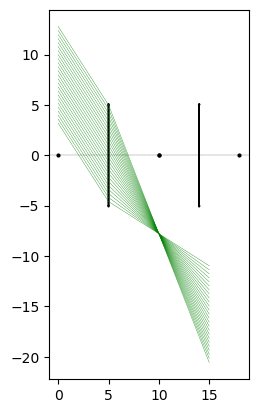

In [5]:
actualYvect = generatriu()
sOBJ = -poslent[0]
yOBJ = font[1]
sIMG = float(0)
yIMG = float(0)
for l in range(0,nlents):
    if (l<nlents-1):
        sIMG = travessalent(flent[l], poslent[l], poslent[l+1], l)
        sOBJ = -poslent[l+1]+poslent[l]+sIMG 
    else:
        sIMG = travessalent(flent[l], poslent[l], poslent[l]+abs(flent[l]), l)
    print('s\' a través de la lent '+str(l+1)+' = '+str(sIMG))
    
pintalents()

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.savefig("output_simuladorOpticaGeo.svg")
plt.show()